In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

['2', '3', '4', '5', '6']


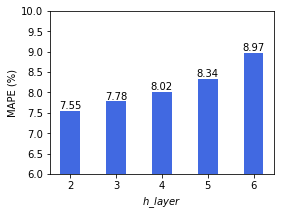

['64', '128', '150', '192', '256', '320', '512']


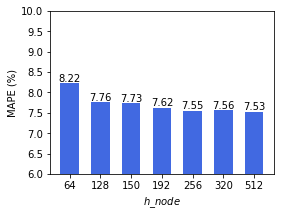

['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7']


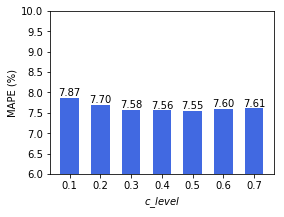

['5', '10', '15', '20', '25', '30', '35']


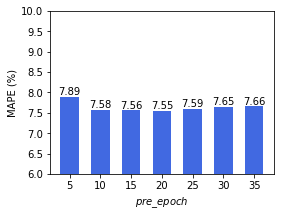

['1', '2', '3', '4', '5', '6']


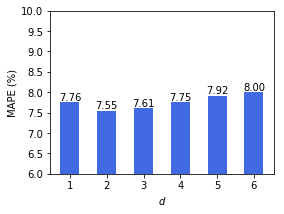

In [128]:
# font=matplotlib.font_manager.FontProperties(fname=r"C:\Windows\Fonts\Deng.ttf")
def barsplot(x_row, y, p, name):
    plt.rcParams["figure.figsize"] = [4,3]
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    n = len(x_row)
    x = np.arange(n)
    x_row = [str(_) for _ in x_row]
    print(x_row)
#     if p == '$h\_layer$':
#         l=plt.bar(x,y,color='royalblue',width=0.4)
#     elif p == '$d$':
#         l=plt.bar(x,y,color='royalblue',width=0.4)
#     else:
#         l=plt.bar(x,y,color='royalblue',width=0.4)
    l=plt.bar(x,y,color='royalblue',width=n/7*0.6)
    ax.set_xticks(x)
    ax.set_xticklabels(x_row)
    plt.xlabel(p)
    plt.ylabel('MAPE (%)')
    plt.ylim(6, 10)
    for _x, _y in zip(x, y):
        plt.text(_x , _y, '%.2f' % _y, ha='center', va='bottom')
    plt.savefig(name+".eps", format='eps', bbox_inches='tight')
    plt.show()
    
x = [[2,3,4,5,6], [64,128,150,192,256,320,512], [0.1,0.2,0.3,0.4,0.5,0.6,0.7], [5,10,15,20,25,30,35], [1,2,3,4,5,6]]
y = [[7.55, 7.78, 8.02, 8.34, 8.97],
     [8.22,7.76,7.73,7.62,7.55,7.56,7.53],
     [7.87,7.70,7.58,7.56,7.55,7.60,7.61],
     [7.89,7.58,7.56,7.55,7.59,7.65,7.66],
     [7.76,7.55,7.61,7.75,7.92,8.00]]
params = ['$h\_layer$', '$h\_node$', '$c\_level$', '$pre\_epoch$', '$d$']
names = ['p-hlayer', 'p-hnode', 'p-clevel', 'p-preepoch', 'p-d']
for _x, _y, _p, _name in zip(x,y,params, names):
    barsplot(_x, _y, _p, _name)

D:\software\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


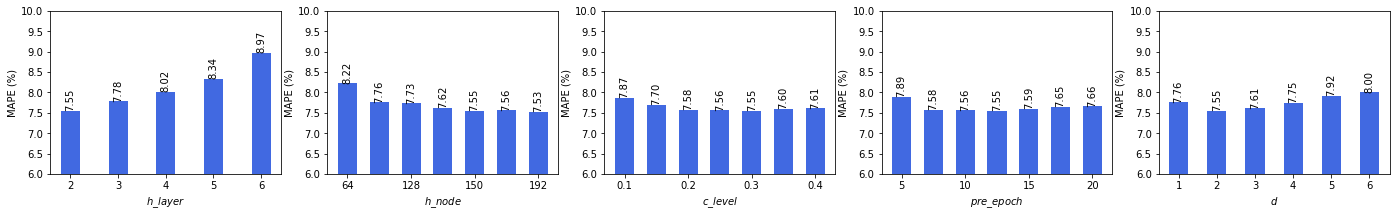

In [106]:
def barsplot(x, y):
    plt.rcParams["figure.figsize"] = [24,3]
    fig, axes = plt.subplots(ncols=5)
    params = ['$h\_layer$', '$h\_node$', '$c\_level$', '$pre\_epoch$', '$d$']
    plt.ylabel('MAPE (%)')
    # 设置x标签
    for i, p in enumerate(params):
        nbar = np.arange(len(x[i]))
        if i == 0:
            axes[i].bar(nbar,y[i],color='royalblue',width=0.4)
        elif i == 4:
            axes[i].bar(nbar,y[i],color='royalblue',width=0.5)
        else:
            axes[i].bar(nbar,y[i],color='royalblue',width=0.6)
        xstr = ['0'] + [str(_) for _ in x[i]]
        axes[i].set_xticklabels(xstr)
        axes[i].set_xlabel(p)
        axes[i].set_ylabel('MAPE (%)')
        axes[i].set_ylim(6, 10)
        for _x, _y in zip(nbar, y[i]):
            axes[i].text(_x , _y, '%.2f' % _y, ha='center', va='bottom', rotation=90)
#     plt.savefig("./p-all.eps", format='eps')
    fig.show()
    
x = [[2,3,4,5,6], [64,128,150,192,256,320,512], [0.1,0.2,0.3,0.4,0.5,0.6,0.7], [5,10,15,20,25,30,35], [1,2,3,4,5,6]]
y = [[7.55, 7.78, 8.02, 8.34, 8.97],
     [8.22,7.76,7.73,7.62,7.55,7.56,7.53],
     [7.87,7.70,7.58,7.56,7.55,7.60,7.61],
     [7.89,7.58,7.56,7.55,7.59,7.65,7.66],
     [7.76,7.55,7.61,7.75,7.92,8.00]]
barsplot(x, y)

In [4]:
import scipy.io as sio

In [2]:
file_path="D:/missdd/ML_Project/Traffic_Flow_Prediction_LSTM/results"
file_results="results"
# file_minmax_test = "data/TrafficFlow_69_12week_6day_minmax_test"
# file_gaussian_test = "data/TrafficFlow_69_12week_6day_gaussian_test"

In [5]:
results=sio.loadmat(os.path.join(file_path, file_results))

In [6]:
y_target = results['y_target']
print(y_target.shape)
y_predict = results['y_predict']
print(y_predict.shape)
mape = results['mape']
print(mape.shape)
mae = results['mae']
print(mae.shape)
rmse = results['rmse']
print(rmse.shape)

(2880, 69)
(2880, 69)
(1, 2000)
(1, 2000)
(1, 2000)


In [7]:
import time

In [8]:
def plot_day(Y_test,Y_predict):
    x1 = time.strptime('2016-01-01 00:00:00','%Y-%m-%d %X')
    x2 = time.strptime('2016-01-02 00:00:00','%Y-%m-%d %X')
    x3 = time.mktime(x1)
    x4 = time.mktime(x2)
    n = len(Y_predict)
    ntick = 24
    delta = (x4 - x3) / ntick
    
    x0 = x3
    xt = [time.strftime('%H:%M',x1)]
    for i in range(ntick-1):
        x0 = x0 + delta
        x00 = time.localtime(x0)
        x00 = time.strftime('%H:%M',x00)
        xt.append(x00)
    xt.append('24:00')
              
    x = np.arange(n)
    fig,ax = plt.subplots()
    plt.plot(x,Y_test,'-k.',x,Y_predict,'-m.')
    plt.xticks(x, xt, rotation = 90)
    plt.xlabel('Time')
    plt.ylabel('Flow  ( Veh / 5 mins )')
    plt.legend(labels = ['Observed traffic flow', 'Predicted traffic flow'], loc = 'lower center')
    
    aticks = np.arange(0,n,12)
    aticks = np.append(aticks, n)    
    ax.set_xticks(aticks)
    ax.set_xticklabels(xt)

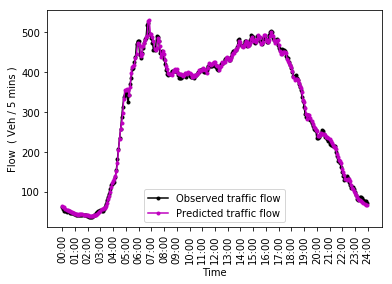

In [9]:
plot_day(y_target[:288, 17]*1188,y_predict[:288, 17]*1188)

In [10]:
def plot_week(Y_test,Y_predict):
    x1 = time.strptime('2016-04-04','%Y-%m-%d')
    x2 = time.strptime('2016-04-09','%Y-%m-%d')
    x3 = time.mktime(x1)
    x4 = time.mktime(x2)
    n = len(Y_predict)
    nday = 5
    delta = (x4 - x3) / nday
    
    x0 = x3
    xt = [time.strftime('%m:%d',x1)]
    for i in range(nday-1):
        x0 = x0 + delta
        x00 = time.localtime(x0)
        x00 = time.strftime('%m-%d',x00)
        xt.append(x00)
    xt.append('04-09')
              
    x = np.arange(n)
    fig,ax = plt.subplots()
    plt.plot(x,Y_test,'-k.',x,Y_predict,'-m.')
    plt.xticks(x, xt)
    plt.xlabel('Date')
    plt.ylabel('Flow  ( Veh / 5 mins )')
    plt.legend(labels = ['Observed traffic flow', 'Predicted traffic flow'], loc = 'center right')
    
    aticks = np.arange(0,n,12*24)
    aticks = np.append(aticks, n)
    ax.set_xticks(aticks)
    ax.set_xticklabels(xt)

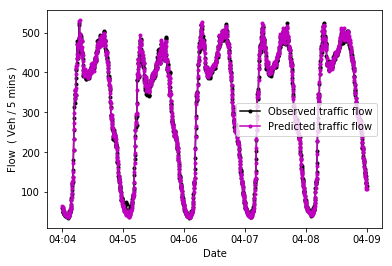

In [11]:
plot_week(y_target[:1440, 17]*1188,y_predict[:1440, 17]*1188)

In [130]:
def cost_mape(xs, criterions, start_index):
    nc = len(criterions)
    fig, axes = plt.subplots(ncols=nc, figsize=(24,6))
    start_index -= 1
    for ci, c in enumerate(criterions):
        cost = np.squeeze(xs[c.lower()]) 
        x = np.arange(start_index, len(cost))
        cost = cost[start_index:]          
        axes[ci].plot(x, cost, label=c)
        axes[ci].set_xlabel('Epoch')
        axes[ci].set_ylabel(c)

1001
1001
1001


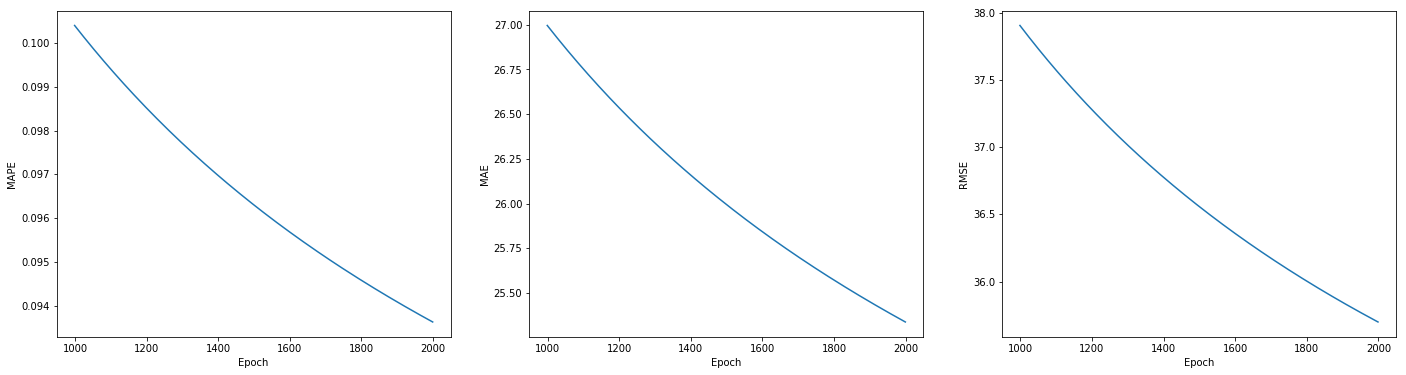

In [129]:
criterions = ['MAPE', 'MAE', 'RMSE']
costs = {'mape':mape, 'mae':mae, 'rmse':rmse}
cost_mape(costs, criterions, 1000)

In [74]:

a1 = np.array([1,2,3])
a2 = np.array([1,2,3])
a = {'a1':a1, 'a2':a2}
sio.savemat('./a', {'a':a})

In [75]:
b = sio.loadmat('./a')
b

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Sat Oct 20 19:46:27 2018',
 '__version__': '1.0',
 'a': array([[(array([[1, 2, 3]]), array([[1, 2, 3]]))]],
       dtype=[('a1', 'O'), ('a2', 'O')])}

2